In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/mpg.csv')

In [2]:
def safe_float(val):
    try:
        return float(val)
    except:
        return None

df['horsepower'] = df['horsepower'].apply(safe_float)
df['weight'] = df['weight'].apply(safe_float)

In [3]:
df.dropna(axis=0, inplace=True)

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [6]:
%matplotlib inline

import seaborn as sns

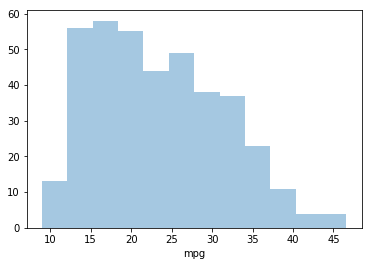

In [92]:
_ = sns.distplot(df['mpg'], kde=False)

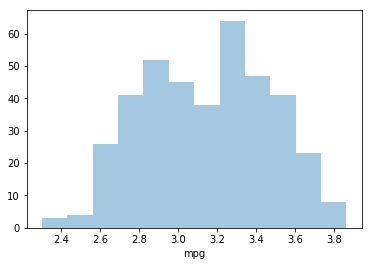

In [94]:
_ = sns.distplot(np.log1p(df['mpg']), kde=False)

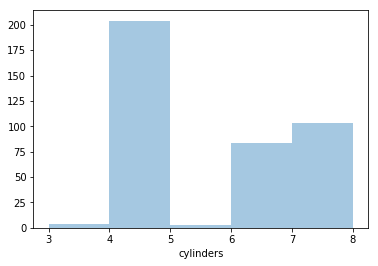

In [61]:
_ = sns.distplot(df['cylinders'], kde=False)

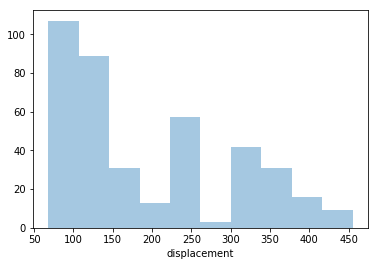

In [62]:
_ = sns.distplot(df['displacement'], kde=False)

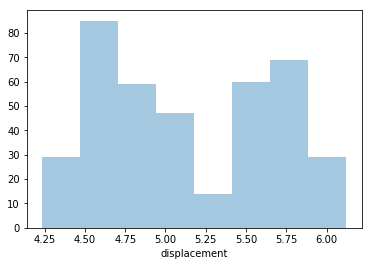

In [111]:
_ = sns.distplot(np.log1p(df['displacement']), kde=False)

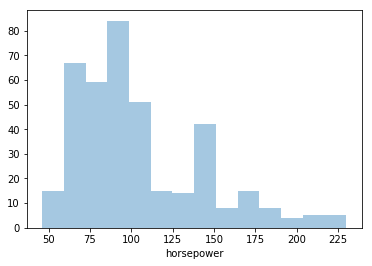

In [95]:
_ = sns.distplot(df['horsepower'], kde=False)

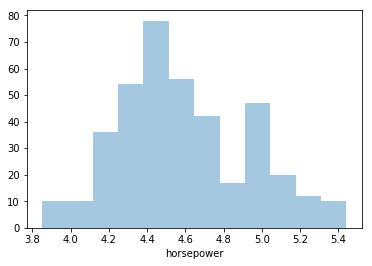

In [112]:
_ = sns.distplot(np.log1p(df['horsepower']), kde=False)

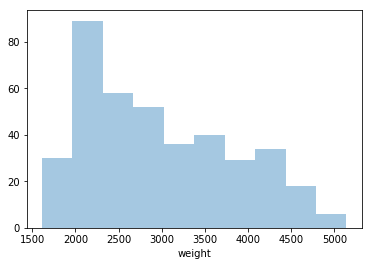

In [96]:
_ = sns.distplot(df['weight'], kde=False)

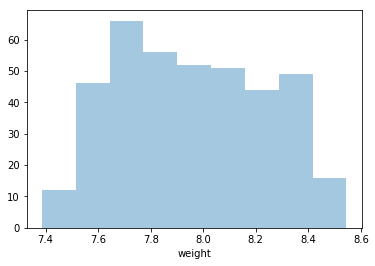

In [113]:
_ = sns.distplot(np.log1p(df['weight']), kde=False)

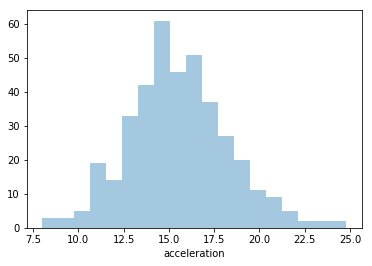

In [98]:
_ = sns.distplot(df['acceleration'], kde=False)

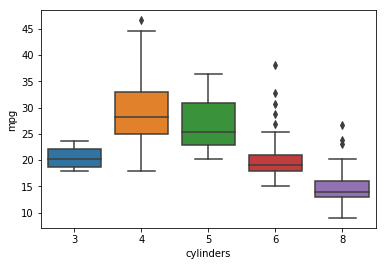

In [67]:
_ = sns.boxplot(data=df, y='mpg', x='cylinders')

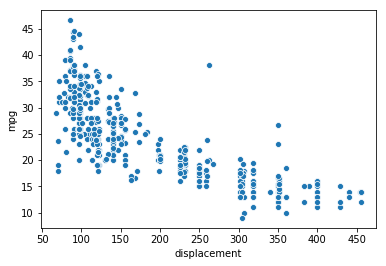

In [54]:
_ = sns.scatterplot(data=df, y='mpg', x='displacement')

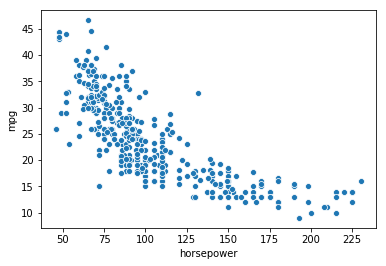

In [55]:
_ = sns.scatterplot(data=df, y='mpg', x='horsepower')

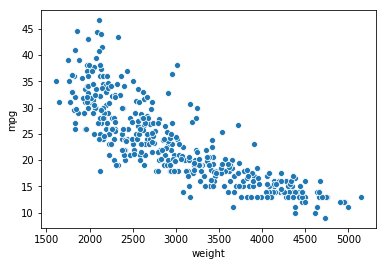

In [65]:
_ = sns.scatterplot(data=df, y='mpg', x='weight')

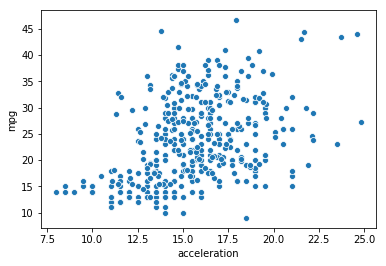

In [64]:
_ = sns.scatterplot(data=df, y='mpg', x='acceleration')

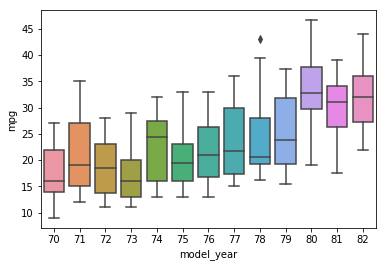

In [21]:
_ = sns.boxplot(data=df, y='mpg', x='model_year')

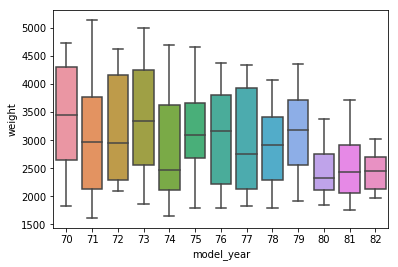

In [20]:
_ = sns.boxplot(data=df, y='weight', x='model_year')

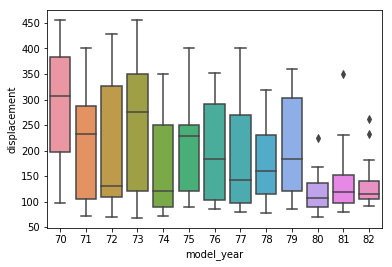

In [22]:
_ = sns.boxplot(data=df, y='displacement', x='model_year')

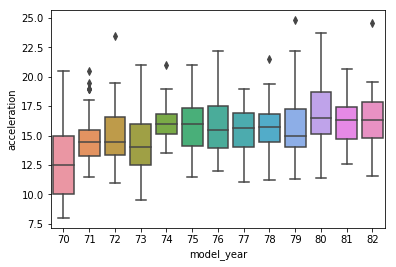

In [25]:
_ = sns.boxplot(data=df, y='acceleration', x='model_year')

In [27]:
X = df.drop(['mpg', 'cylinders', 'origin', 'model_year', 'name'], axis=1)
y = df['mpg']

X['displacement'] = np.log1p(X['displacement'])
X['horsepower'] = np.log1p(X['horsepower'])
X['weight'] = np.log1p(X['weight'])

temp = pd.get_dummies(df['cylinders'], prefix='cylinders')
X[temp.columns] = temp

temp = pd.get_dummies(df['model_year'], prefix='model_year')
X[temp.columns] = temp

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.log1p(y)

/home/dehling/Documents/machine-learnings/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dehling/Documents/machine-learnings/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    SVR(gamma=0.25),
    #MLPRegressor(hidden_layer_sizes=(1,), max_iter=500),
    RandomForestRegressor(n_estimators=25),
    GradientBoostingRegressor(),
]

for model in models:
    scores = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2), scoring='r2')
    print("Score {:<32s}: {:.3f} (+/- {:.3f})".format(model.__class__.__name__, scores.mean(), scores.std()))

Score LinearRegression                : 0.907 (+/- 0.009)
Score Lasso                           : -0.018 (+/- 0.026)
Score Ridge                           : 0.901 (+/- 0.017)
Score ElasticNet                      : -0.016 (+/- 0.013)
Score SVR                             : 0.841 (+/- 0.024)
Score RandomForestRegressor           : 0.844 (+/- 0.031)
Score GradientBoostingRegressor       : 0.863 (+/- 0.027)
